In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

df = pd.read_csv("data.txt", sep=';')

df= df[df.data == "2021-03-10T18:00:00"]
df=df.dropna()


FileNotFoundError: [Errno 2] File data.txt does not exist: 'data.txt'

In [2]:
from sklearn import metrics
df

,lp,data,odbiornik,temp,X,Y,Hour,cisnienie,wilgotnosc,PM1,PM25,PM10
0,7921,2021-03-10T18:00:00,37927,1.47,412874.2819,5519656.709,18,1020.91,58.26,32.38,57.19,78.95
1,7922,2021-03-10T18:00:00,37933,1.49,429015.5453,5518517.071,18,1020.82,58.82,37.84,72.91,87.92
2,7923,2021-03-10T18:00:00,37925,1.04,436451.5851,5515753.698,18,1020.96,63.09,66.00,110.30,134.88
3,7924,2021-03-10T18:00:00,37928,1.84,424271.5884,5520183.968,18,1021.19,55.36,25.81,41.61,52.90
4,7925,2021-03-10T18:00:00,37932,1.61,422142.7657,5520520.534,18,1022.16,58.91,57.12,120.90,148.60
...,...,...,...,...,...,...,...,...,...,...,...,...
85,8006,2021-03-10T18:00:00,35769,2.21,438374.7296,5564760.980,18,1021.73,63.42,31.96,53.61,63.01
86,8007,2021-03-10T18:00:00,7462,-0.33,422638.7885,5569556.971,18,1020.05,60.94,20.14,33.27,42.36
87,8008,2021-03-10T18:00:00,401,1.31,425059.9711,5568227.769,18,1020.74,72.85,34.45,51.10,61.71
88,8009,2021-03-10T18:00:00,683,0.98,431055.3858,5570307.938,18,1018.28,60.17,34.89,56.15,71.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 89
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lp          86 non-null     int64  
 1   data        86 non-null     object 
 2   odbiornik   86 non-null     int64  
 3   temp        86 non-null     float64
 4   X           86 non-null     float64
 5   Y           86 non-null     float64
 6   Hour        86 non-null     int64  
 7   cisnienie   86 non-null     float64
 8   wilgotnosc  86 non-null     float64
 9   PM1         86 non-null     float64
 10  PM25        86 non-null     float64
 11  PM10        86 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 8.7+ KB


In [4]:
df.describe()

,lp,odbiornik,temp,X,Y,Hour,cisnienie,wilgotnosc,PM1,PM25,PM10
count,86.000000,86.000000,86.000000,86.000000,8.600000e+01,86.0,86.000000,86.000000,86.000000,86.000000,86.000000
mean,7965.918605,14972.686047,0.899535,427465.072583,5.543619e+06,18.0,1020.629884,61.588721,33.627442,56.878372,70.905233
std,26.202925,14225.102569,0.812352,14576.360072,1.435037e+04,0.0,1.045199,7.124196,15.857767,30.701459,39.210118
min,7921.000000,241.000000,-0.970000,401094.911500,5.515754e+06,18.0,1018.280000,44.180000,9.990000,15.480000,17.570000
25%,7943.250000,2893.250000,0.405000,416100.939850,5.531737e+06,18.0,1019.967500,57.792500,23.132500,35.017500,44.727500
50%,7966.500000,8583.500000,0.845000,426841.822950,5.543698e+06,18.0,1020.705000,60.530000,28.700000,46.095000,60.730000
75%,7987.750000,32883.000000,1.465000,438220.274900,5.554208e+06,18.0,1021.500000,67.595000,38.275000,68.252500,82.087500
max,8010.000000,39641.000000,2.700000,455133.772100,5.570308e+06,18.0,1022.630000,73.560000,89.390000,151.060000,206.090000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 89
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lp          86 non-null     int64  
 1   data        86 non-null     object 
 2   odbiornik   86 non-null     int64  
 3   temp        86 non-null     float64
 4   X           86 non-null     float64
 5   Y           86 non-null     float64
 6   Hour        86 non-null     int64  
 7   cisnienie   86 non-null     float64
 8   wilgotnosc  86 non-null     float64
 9   PM1         86 non-null     float64
 10  PM25        86 non-null     float64
 11  PM10        86 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 8.7+ KB


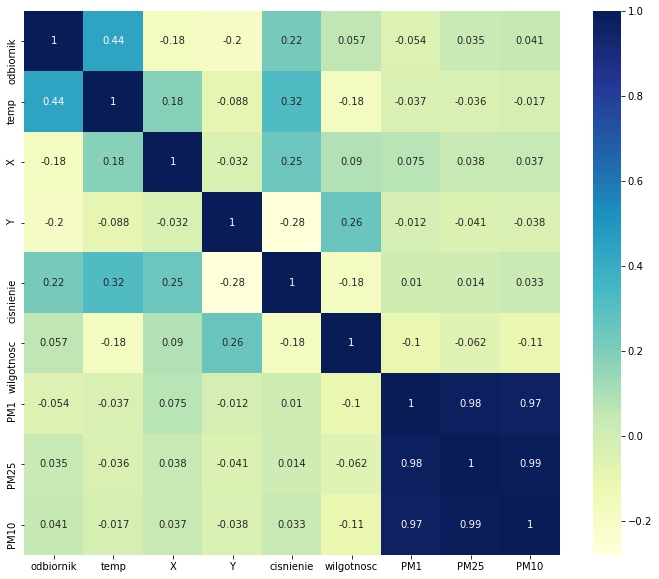

In [6]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.drop(["Hour","lp"], axis =1).corr(),annot=True , cmap="YlGnBu")

In [7]:
for i in range(3,10):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-7-de3ac7a9f5f3>, line 2)

In [8]:
model_3 = KMeans(n_clusters=3)
model_5 = KMeans(n_clusters=5)
model_7 = KMeans(n_clusters=7)

In [9]:
scaler = StandardScaler()
scaler_2 = StandardScaler()

X = df.drop(["lp","odbiornik","Hour","data"], axis=1)
X_No_x_y = df.drop(["lp","odbiornik","Hour","data", "X",'Y'], axis=1)

scaler.fit(X)
scaler_2.fit(X_No_x_y)

X_St = scaler.transform(X)
X_St_No_x_y= scaler_2.transform(X_No_x_y)

In [10]:
def genChart(model, title, pos, X_data):
    model.fit(X_data)
    y = model.predict(X_data)
    df['k'] = y
    df['k'] = 'Klaster'+(df['k']+1).astype('str')
    data = df.drop(["lp","odbiornik","Hour","data"], axis=1)
    ax = plt.subplot(2,2,pos, title = title)
    sns.scatterplot(data = data, x ="X",y = "Y", hue = "k" )
    labels = model.labels_
    print(metrics.calinski_harabasz_score(X, labels))

In [11]:
def predictModel(model):
    plt.figure(figsize = (16, 12))
    genChart(model,"NO Standard",1,X)
    genChart(model,"NO Standard, No X and Y ",2,X_No_x_y)
    genChart(model,"After Standard",3,X_St)
    genChart(model,"After Standard, No X and Y ",4,X_St_No_x_y)


70.53442745562383
0.4260664026725488
5.347285272503081
2.557806966553324


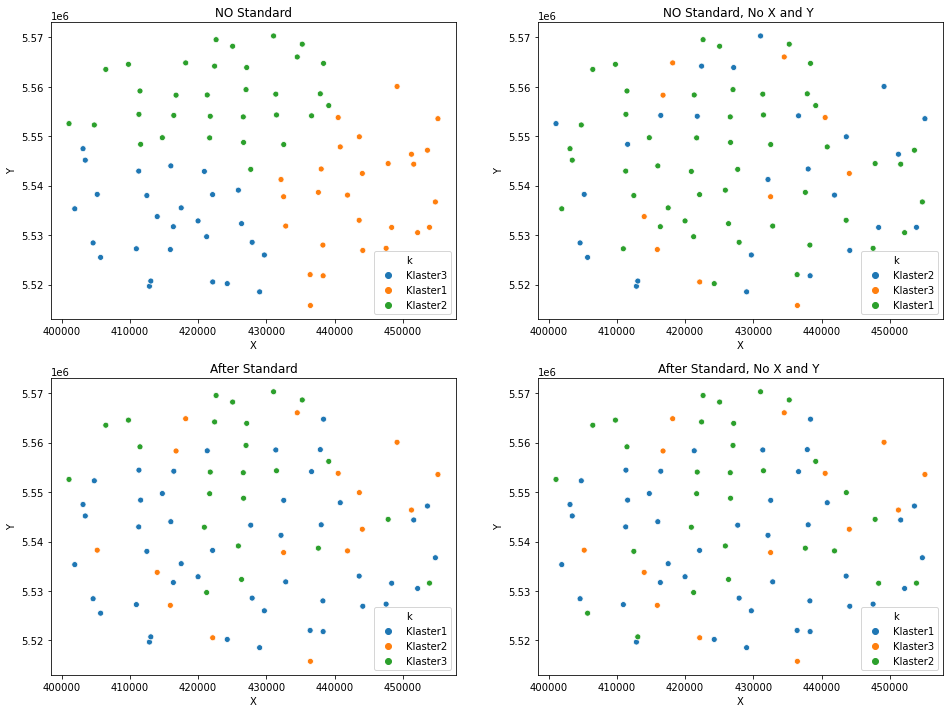

In [12]:
predictModel(model_3)

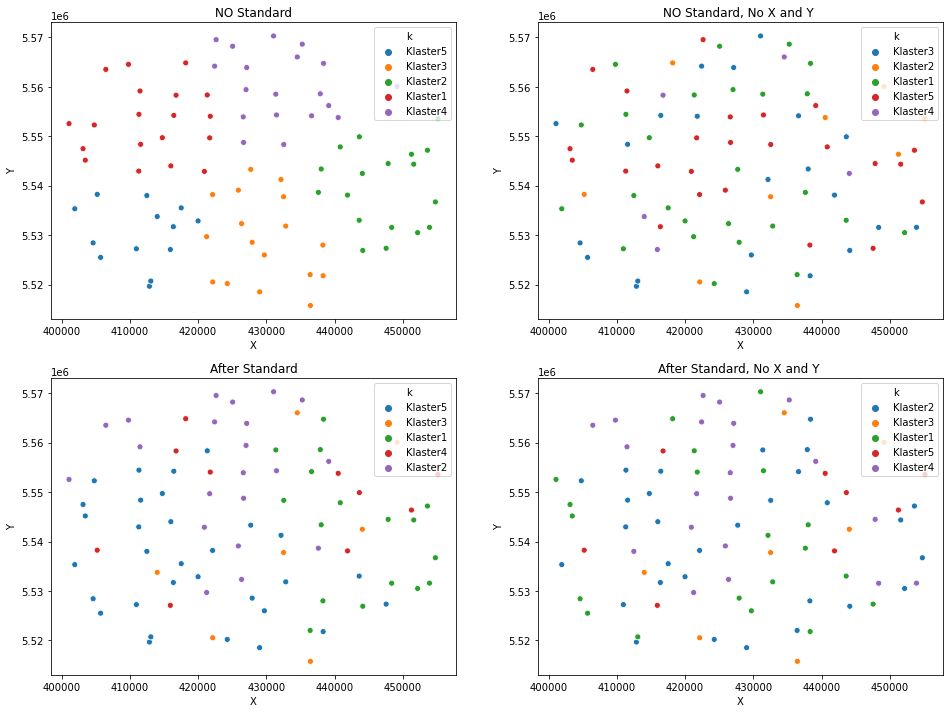

In [24]:
predictModel(model_5)

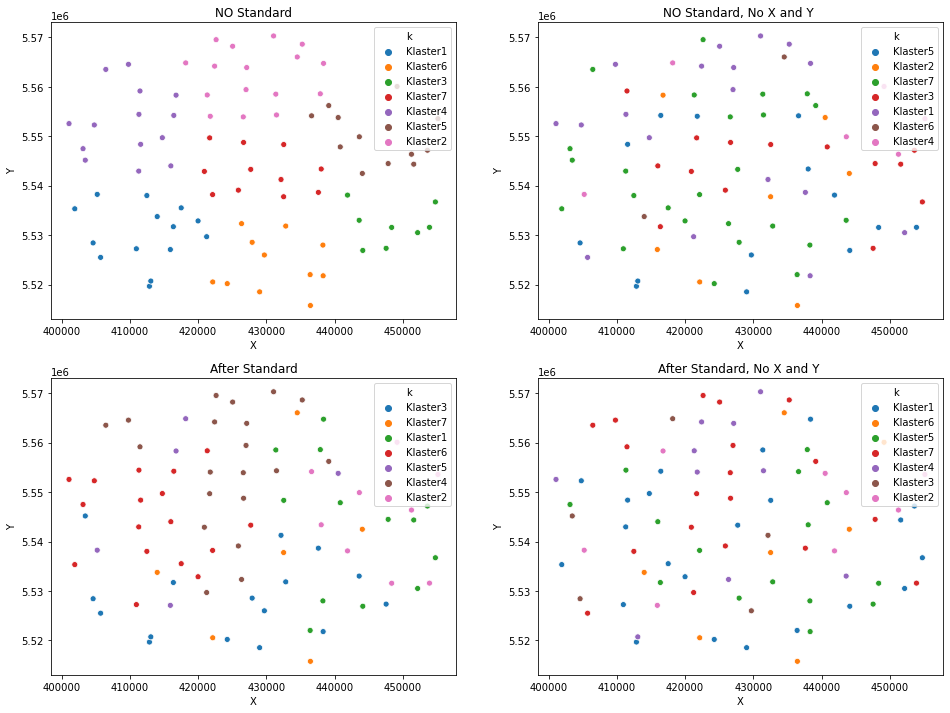

In [25]:
predictModel(model_7)

# Comment
Uzyskane wyniki klasteryzacji przy wykorzystaniu metody K-srednich, pokazują iż
    - Bez Standaryzacji Parametry X i Y bardzo mocno wplywaja na wynik klasteryzacji
    - Ogolnie moim zdaniem lokalizacja w tym zbiorze nie powinna być używana jesli celem grupowania jest utworzenie np. klastrów przedstawiających jakość powietrza (np. dla modelu_3 - zla srednia dobra) 
    
    
Poniżej przedstawiono dodatkowo Te same dane jednak na wykresach zaleznosci Wartosci pylkow PM

# Ewaluacja ilości klastrów

In [1]:
from sklearn import metrics

In [2]:
def calHarScore(X_,labels):
    return metrics.calinski_harabasz_score(X_, labels)


In [3]:
def sseScore(kmeans_model):
    return kmeans_model.inertia_


In [4]:
def silhScore(X_,labels):
     return metrics.silhouette_score(X_, labels)


In [5]:
def davBouScore(X_,labels):
    return metrics.davies_bouldin_score(X_, labels)


In [11]:
def calcScore(kNo,dataF,dataDrop):
    kmeans_model = KMeans(n_clusters=kNo)
    X_ = dataF.drop(dataDrop, axis =1)
    Y = kmeans_model.fit_predict(X_)
    labels = kmeans_model.labels_
    return calHarScore(X_,Y),\
            sseScore(kmeans_model),\
            silhScore(X_,Y),\
            davBouScore(X_,Y),\
            kmeans_model


In [12]:
dataToDrop = ["lp","odbiornik","Hour","data", "X",'Y']
df_ = pd.read_csv("dane_polution.txt", sep=';')
df_= df_[df_.data == "2021-03-10T18:00:00"]
df_=df_.dropna()
X_dropped= df_.drop(dataToDrop, axis =1)
calcScore(3,df_,dataToDrop)
df_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 89
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lp          86 non-null     int64  
 1   data        86 non-null     object 
 2   odbiornik   86 non-null     int64  
 3   temp        86 non-null     float64
 4   X           86 non-null     float64
 5   Y           86 non-null     float64
 6   Hour        86 non-null     int64  
 7   cisnienie   86 non-null     float64
 8   wilgotnosc  86 non-null     float64
 9   PM1         86 non-null     float64
 10  PM25        86 non-null     float64
 11  PM10        86 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 8.7+ KB


In [14]:
df_cluster_score = pd.DataFrame()
df_cluster_score["clusters"] = list((range(2,21)))

    
df_cluster_score["Calinski_Harabasz"],df_cluster_score["SSE"], df_cluster_score["Sillhouette"],\
df_cluster_score["Davies_boudin"],df_cluster_score["model"] = zip(*df_cluster_score["clusters"].map(lambda kNo :calcScore(kNo,df_,dataToDrop)))


df_cluster_score

,clusters,Calinski_Harabasz,SSE,Sillhouette,Davies_boudin,model
0,2,197.305582,70662.215783,0.686679,0.472778,KMeans(n_clusters=2)
1,3,230.047837,36164.966301,0.533958,0.594351,KMeans(n_clusters=3)
2,4,228.514644,25281.155840,0.448911,0.676813,KMeans(n_clusters=4)
3,5,240.274911,18393.403028,0.405929,0.739569,KMeans(n_clusters=5)
4,6,255.642291,13938.271340,0.414600,0.670541,KMeans(n_clusters=6)
5,7,262.209954,11314.492821,0.386783,0.705460,KMeans(n_clusters=7)
6,8,260.447173,9708.878259,0.362768,0.771933,KMeans()
7,9,269.276176,8166.513976,0.367074,0.803551,KMeans(n_clusters=9)
8,10,261.637766,7398.802237,0.356213,0.829521,KMeans(n_clusters=10)
9,11,251.016694,6865.291579,0.339514,0.851154,KMeans(n_clusters=11)


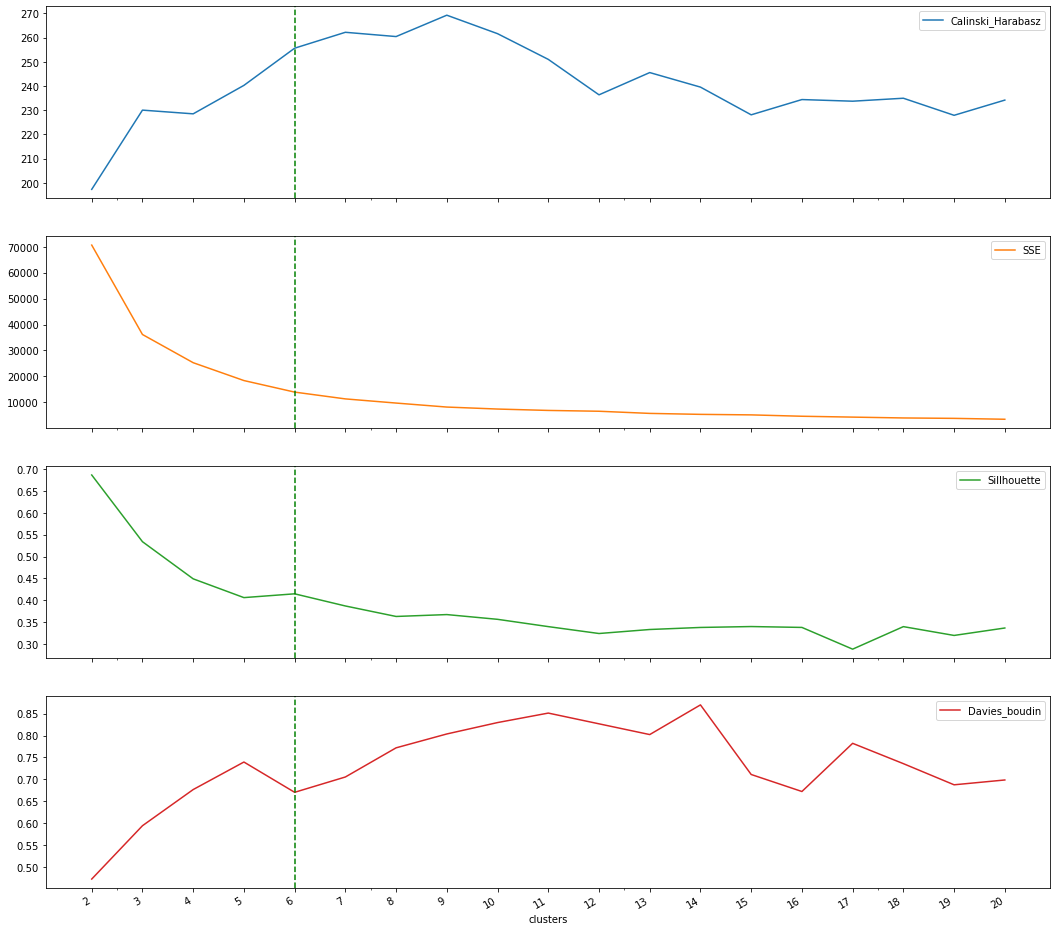

In [15]:
#  - Calinski_Harabasz szukamy maximum
#  - Davies_boudin szukamy minimum

bestK = 6
axs = df_cluster_score.plot(x = "clusters",figsize=(18,18), xticks=(range(2,21)), subplots=True)
for ax in axs:
    ax.axvline(bestK, color="green", linestyle="--") 

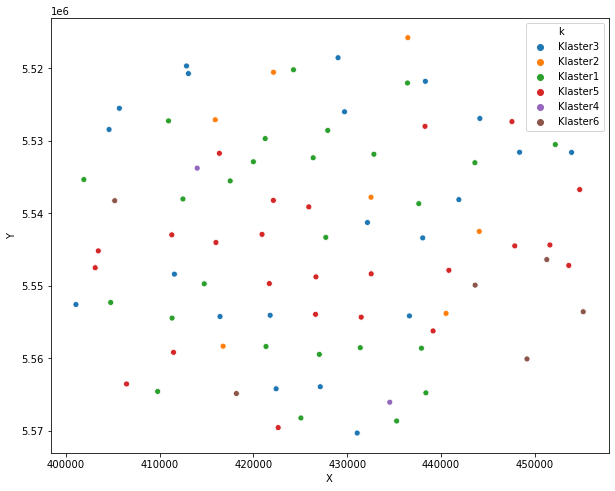

In [155]:
df_cluster_score["model"][bestK-2].fit(X_dropped)
y = df_cluster_score["model"][bestK-2].predict(X_dropped)
df_['k'] = y
df_['k'] = 'Klaster'+(df_['k']+1).astype('str')
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data = df_, x ="X", y = "Y", hue = "k" )
ax.invert_yaxis()

# Results

  z obserwacji stwierdzono iz najlepsza iloscia klastrow jest 6. W tym miejscu Davies_boudin osiaga minimum oraz  Calinski_Harabasz maksimum lokalne.